In [10]:

import uproot as ur, numpy as np, matplotlib.pyplot as plt

import mplhep as hep
hep.style.use("CMS")

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

In [12]:


trees={A: ur.open(f'tweak/GiBUU_{A}_tweak_harut.root:RootTuple').arrays()for A in "D C Fe Pb".split()}


In [15]:
#count the number of kaons, protons and pions with p/nu>0.5
nparticles={A:{} for A in trees.keys()}
for A in trees.keys():
    maxEvents=100000
    for event in range(min(len(trees[A]), maxEvents)):
        
        for i in range(len(trees[A]['Px'][event])):
            if trees[A]['Px'][event][i]**2+trees[A]['Py'][event][i]**2+trees[A]['Py'][event][i]**2>(.5*trees[A]['nu'][event])**2:
                if trees[A]['barcode'][event][i] not in nparticles[A].keys():
                    nparticles[A][trees[A]['barcode'][event][i] ]=0
                nparticles[A][trees[A]['barcode'][event][i] ]+=1
        
            

KeyboardInterrupt: 

In [4]:
for A in "D C Fe Pb".split():
    #print(A, nparticles[A],nparticles[A][2212]/nparticles[A][211], nparticles[A][321]/nparticles[A][211])
    print(A, nparticles[A][2212]/nparticles[A][211], nparticles[A][321]/nparticles[A][211])

D 2.086108727868341 0.11660556898837844
C 2.3628352490421456 0.13697318007662834
Fe 2.6513133325034235 0.147765467446782
Pb 3.239758595464521 0.17282370153621068


D 2212 1.00
C 2212 1.13
Fe 2212 1.27
Pb 2212 1.55
D 321 1.00
C 321 1.17
Fe 321 1.27
Pb 321 1.48


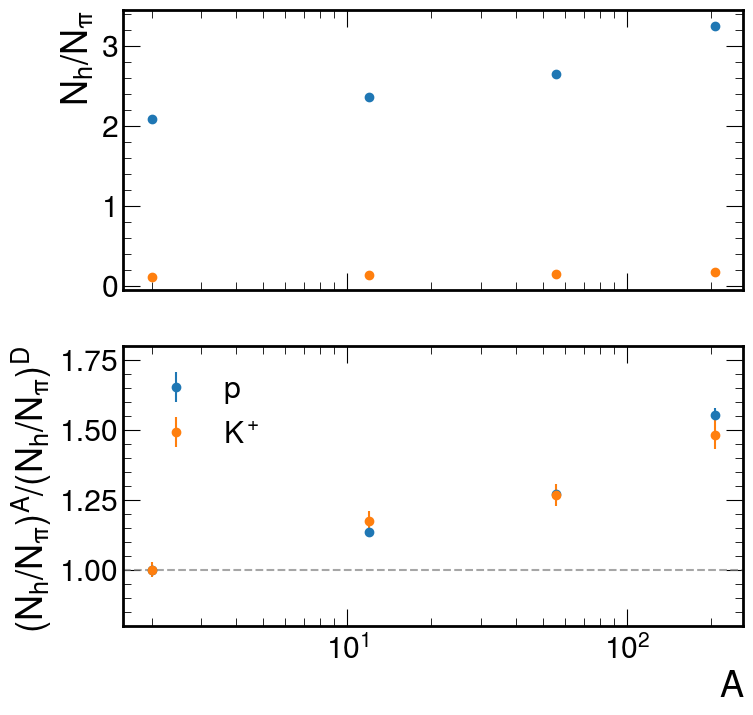

In [5]:
fig, axs=plt.subplots(2,1, figsize=(8,8),sharex='all')

As=[2,12, 56, 207]
plt.sca(axs[0])
names={2212:'$p$',  321:'$K^+$'}
for barcode in 2212, 321:
    y=[]
    dy=[]
    for x,A in zip(As,"D C Fe Pb".split()):
        y.append(nparticles[A][barcode]/nparticles[A][211])
        dy.append(y[-1]*np.sqrt(1/nparticles[A][barcode] +1/nparticles[A][211]))
    plt.errorbar(As, y, dy, label=names[barcode], marker='o', linestyle='')
plt.xscale('log')
plt.ylabel("$N_h/N_\pi$")
plt.sca(axs[1])
names={2212:'$p$',  321:'$K^+$'}
for barcode in 2212, 321:
    y=[]
    dy=[]
    for x,A in zip(As,"D C Fe Pb".split()):
        y.append(nparticles[A][barcode]/nparticles[A][211]/(nparticles["D"][barcode]/nparticles["D"][211]))
        dy.append(y[-1]*np.sqrt(1/nparticles[A][barcode] +1/nparticles[A][211] ))
        print(A, barcode, "%.2f"%y[-1])
    plt.errorbar(As, y, dy, label=names[barcode], marker='o', linestyle='')
plt.ylim(0.8, 1.8)

plt.legend()
plt.axhline(1, linestyle='--', color='0.5', alpha=0.7)
plt.ylabel("$(N_h/N_\pi)^A/(N_h/N_\pi)^D$")
plt.xlabel("A")
plt.show()

In [21]:
hists={A:{} for A in trees.keys()}
for A in trees.keys():
    maxEvents=500000
    evtcount = 0
    tree=trees[A]
    for event in range(min(len(trees[A]), maxEvents)):
        if event %500 == 0:
            print(event, "events processed")
        
        
        barcode=tree['barcode'][event]
        Px,Py,Pz,E,nu=tree['Px'][event],tree['Py'][event],tree['Pz'][event],tree['E'][event],tree['nu'][event]
        pT=np.hypot(Px,Py)
        z=np.sqrt(Px**2+Py**2+Pz**2)/nu
        for i in range(len(trees[A]['Px'][event])):
            z1=z[i]
            if z1>.5 and z1<1:
                for j in range(len(barcode)) :
                    if j == i or barcode[j] !=-211 or E[j]/nu < 0.05 or E[j]<.350 : continue
                    if pT[i]<.250 or pT[j]<.250: continue
                    #crossp=event.Px[i]*event.Py[j]-event.Px[j]*event.Py[i]
                    dphi = np.arctan2(Py[i],Px[i])-np.arctan2(Py[j],Px[j])
                    while dphi>np.pi: dphi-=2*np.pi
                    while dphi<-np.pi: dphi+=2*np.pi
                    dphi=abs(dphi)
                    #dphi = np.abs(np.arcsin(crossp/pT1/pT2))
                    #print(pT1,pT2, crossp, crossp/pT1/pT2,dphi)
                    if barcode[i] not in hists[A].keys():
                        hists[A][barcode[i]]=[0]*8
                    bini = int(dphi//(np.pi/8))
                    #if bini>3:
                    #    print(bini)
                    hists[A][barcode[i]][bini]+=1
                    

0 events processed
500 events processed
1000 events processed
1500 events processed
2000 events processed
2500 events processed
3000 events processed
3500 events processed
4000 events processed
4500 events processed
5000 events processed
5500 events processed
6000 events processed
6500 events processed
7000 events processed
7500 events processed
8000 events processed
8500 events processed
9000 events processed
9500 events processed
10000 events processed
10500 events processed
11000 events processed
11500 events processed
12000 events processed
12500 events processed
13000 events processed
13500 events processed
14000 events processed
14500 events processed
15000 events processed
15500 events processed
16000 events processed
16500 events processed
17000 events processed
17500 events processed
18000 events processed
18500 events processed
19000 events processed
19500 events processed
20000 events processed
20500 events processed
21000 events processed
21500 events processed
22000 events

KeyboardInterrupt: 

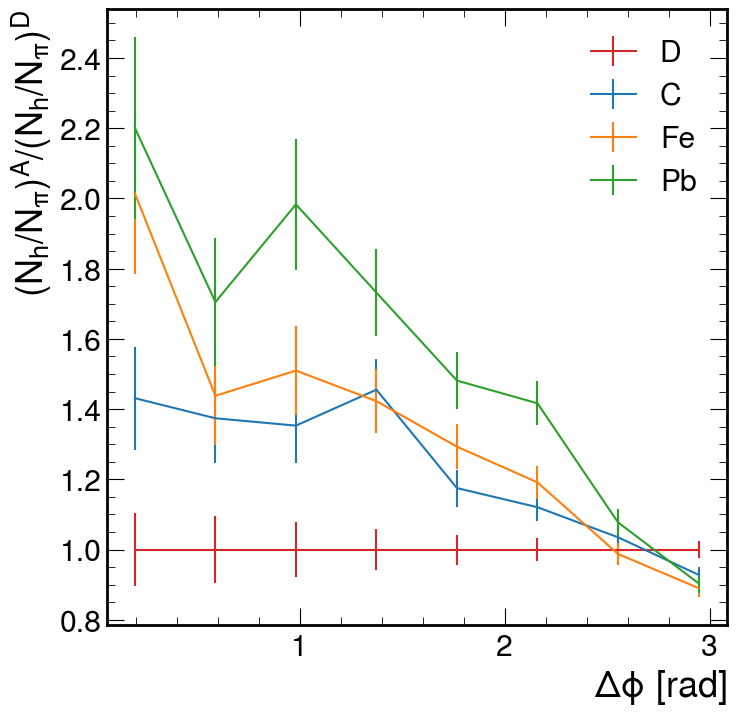

In [7]:
fig, axs=plt.subplots(1,1, figsize=(8,8),sharex='all')
#plt.sca(axs[0])

plt.ylabel("$(N_h/N_\pi)^A/(N_h/N_\pi)^D$")
colors="tab:red tab:blue tab:orange tab:green".split()
for i,A in enumerate("D C Fe Pb".split()):
    for barcode in 2212,:
        y=np.array(hists[A][barcode])/hists["D"][barcode]/(np.array(hists[A][211])/hists["D"][211])
        dy=y*np.sqrt(1/np.array(hists[A][barcode])+1/np.array(hists["D"][barcode])+1/np.array(hists[A][211])+1/np.array(hists["D"][211]))
        plt.errorbar(np.linspace(np.pi/16, np.pi*15/16, 8),
                     y,dy,
                    label=A, color=colors[i])
plt.xlabel("$\Delta\phi$ [rad]")
plt.legend()
plt.show()

In [ ]:
dicts={A:{"h1_pid":[], "h1_pt":[],
         "h2_pt":[],
         "drap":[],
         "dphi":[]} for A in trees.keys()}
for A in trees.keys():
    maxEvents=5000000
    tree=trees[A]
    for event in range(min(len(tree), maxEvents)):
        if event %500 == 0:
            print(event, "events processed")
        barcode=tree['barcode'][event]
        Px,Py,Pz,E,nu=tree['Px'][event],tree['Py'][event],tree['Pz'][event],tree['E'][event],tree['nu'][event]
        pT=np.hypot(Px,Py)
        z=np.sqrt(Px**2+Py**2+Pz**2)/nu
        for i in range(len(trees[A]['Px'][event])):
            z1=z[i]
            if z1>.5 and z1<1:
                for j in range(len(barcode)) :
                    if j == i or barcode[j] !=-211 or E[j]/nu < 0.05 or E[j]<.350 : continue
                    if pT[i]<.250 or pT[j]<.250: continue
                    #crossp=event.Px[i]*event.Py[j]-event.Px[j]*event.Py[i]
                    dphi = np.arctan2(Py[i],Px[i])-np.arctan2(Py[j],Px[j])
                    while dphi>np.pi: dphi-=2*np.pi
                    while dphi<-np.pi: dphi+=2*np.pi
                    dphi=abs(dphi)
                    
                    z2=z[j]
                    if z1+z2>1:
                        continue
                    
                    drap=np.log((E[i]+Pz[i])/(E[i]-Pz[i])/\
                                       ((E[j]+Pz[j])/(E[j]-Pz[j])))/2
                    
                    dicts[A]["h1_pid"].append(barcode[i])
                    dicts[A]["h1_pt"].append(pT1)
                    dicts[A]["h2_pt"].append(pT2)
                    dicts[A]["dphi"].append(dphi)
                    dicts[A]["drap"].append(drap)
                    # if event.barcode[i] not in hists[A].keys():
                    #     hists[A][event.barcode[i]]=[0]*8
                    # bini = int(dphi//(np.pi/8))
                    # #if bini>3:
                    # #    print(bini)
                    # hists[A][event.barcode[i]][bini]+=1
                    

0 events processed
500 events processed
1000 events processed
1500 events processed
2000 events processed
2500 events processed
3000 events processed
3500 events processed
4000 events processed
4500 events processed
5000 events processed
5500 events processed
6000 events processed
6500 events processed
7000 events processed
7500 events processed
8000 events processed
8500 events processed
9000 events processed
9500 events processed
10000 events processed
10500 events processed
11000 events processed
11500 events processed
12000 events processed
12500 events processed
13000 events processed
13500 events processed
14000 events processed
14500 events processed
15000 events processed
15500 events processed
16000 events processed
16500 events processed
17000 events processed
17500 events processed
18000 events processed
18500 events processed
19000 events processed
19500 events processed
20000 events processed
20500 events processed
21000 events processed
21500 events processed
22000 events

In [13]:
import pandas as pd
dfs={A : pd.DataFrame(dicts[A]) for A in dicts}

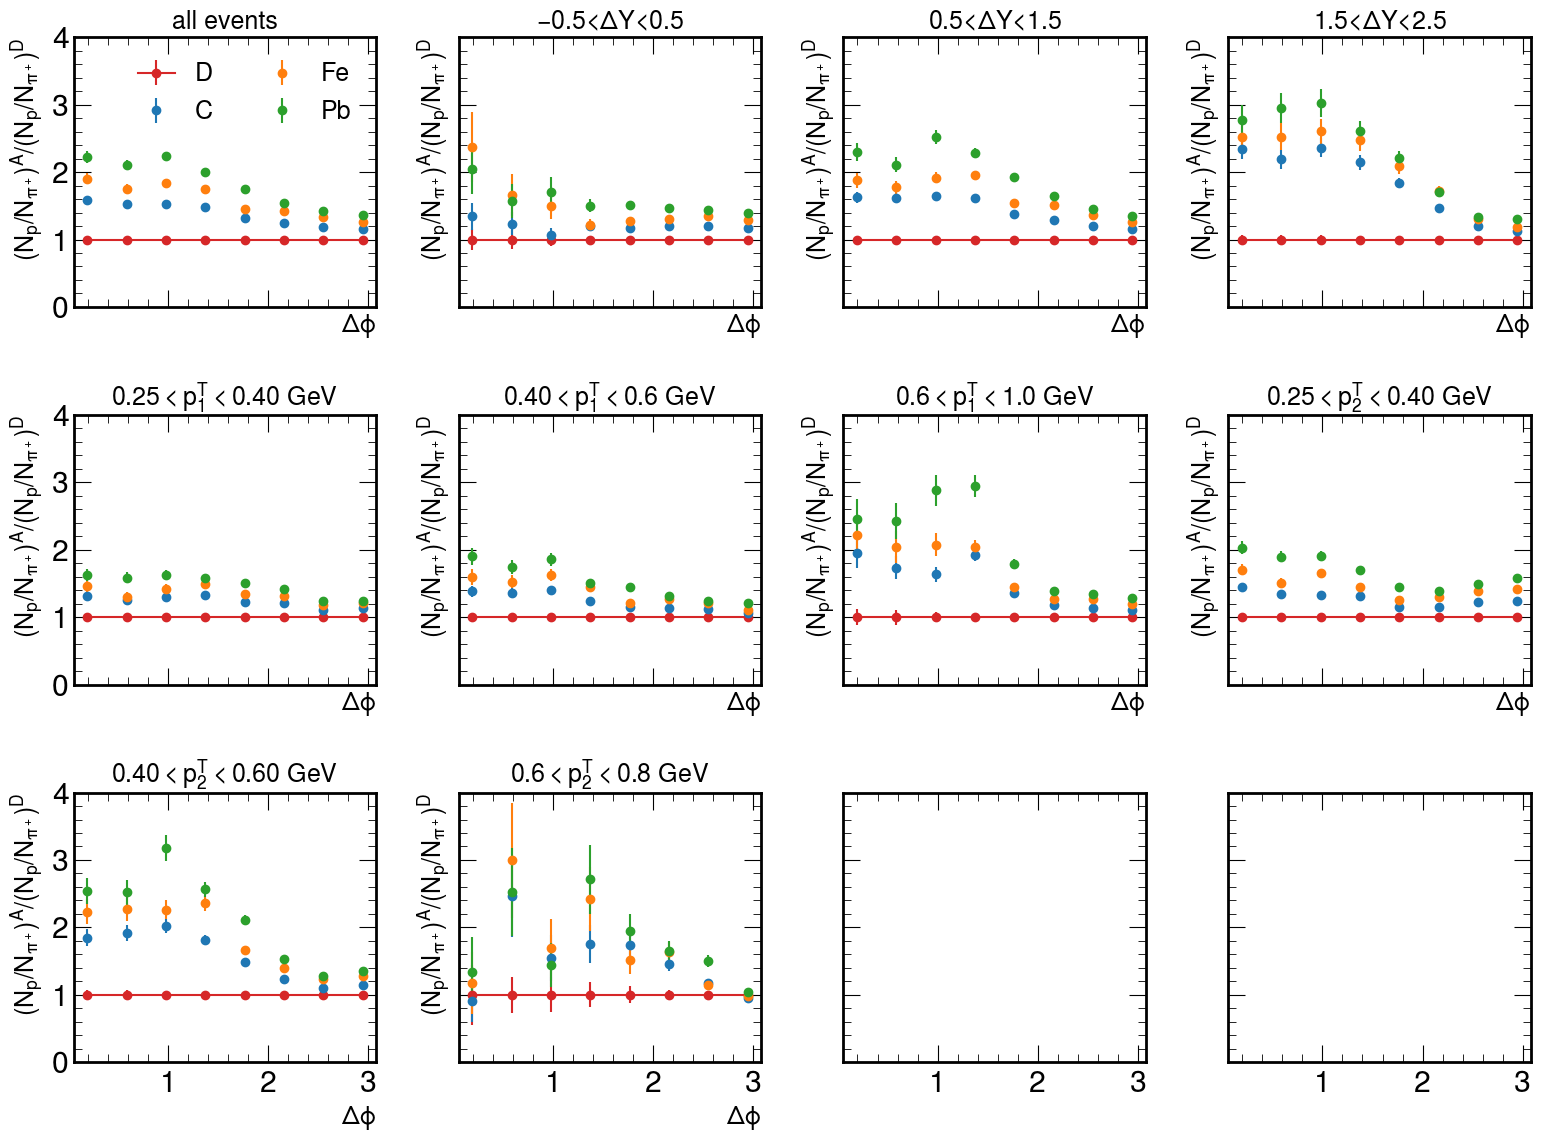

<ipython-input-17-bec234e6caac>:46: RuntimeWarning: invalid value encountered in true_divide
  y=hAp/hApi/(hDp/hDpi)
<ipython-input-17-bec234e6caac>:47: RuntimeWarning: divide by zero encountered in true_divide
  dy=y*np.sqrt(1/hAp+1/hApi+1/hDp+1/hDpi)
<ipython-input-17-bec234e6caac>:46: RuntimeWarning: divide by zero encountered in true_divide
  y=hAp/hApi/(hDp/hDpi)
<ipython-input-17-bec234e6caac>:46: RuntimeWarning: invalid value encountered in true_divide
  y=hAp/hApi/(hDp/hDpi)
<ipython-input-17-bec234e6caac>:47: RuntimeWarning: divide by zero encountered in true_divide
  dy=y*np.sqrt(1/hAp+1/hApi+1/hDp+1/hDpi)
/home/sebouh/.local/lib/python3.8/site-packages/matplotlib/axes/_axes.py:3465: RuntimeWarning: invalid value encountered in add
  low, high = dep + np.row_stack([-(1 - lolims), 1 - uplims]) * err
<ipython-input-17-bec234e6caac>:46: RuntimeWarning: divide by zero encountered in true_divide
  y=hAp/hApi/(hDp/hDpi)
<ipython-input-17-bec234e6caac>:46: RuntimeWarning: invalid va

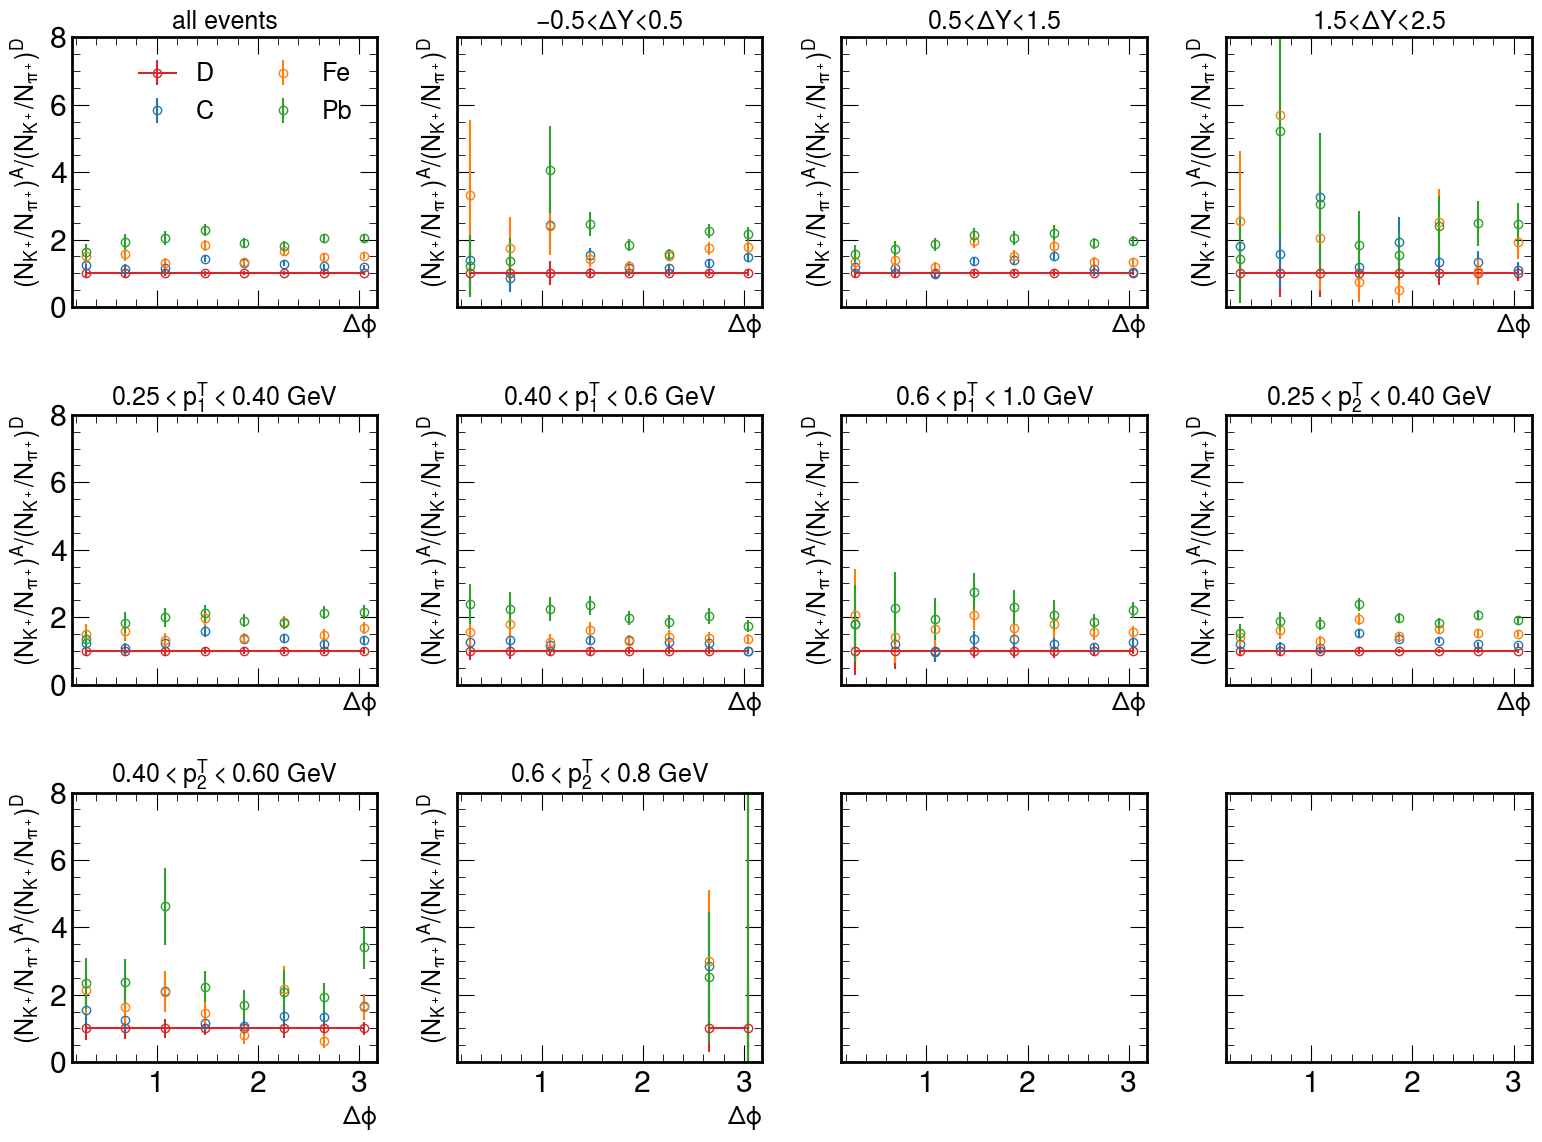

In [17]:
scale_table_p={}
scale_table_K={}
for barcode in 2212,321:
    fig, axs= plt.subplots(3,4, figsize=(16, 12),sharex='all', sharey='all')
#     queries=["dphi==dphi", "drap>0 and drap<0.5", "drap>0.5 and drap<1.0", "drap>1.0 and drap<1.5",
#             "drap>1.5 and drap<2.0", "h1_pt>0.25 and h1_pt<.40", "h1_pt>0.40 and h1_pt<0.6", 
#              "h1_pt>0.6 and h1_pt<1.0","h2_pt>0.25 and h2_pt<.40", "h2_pt>0.40 and h2_pt<0.6", 
#              "h2_pt>0.6 and h2_pt<0.8"]
#     titles = ["all events", "0<$\Delta Y$<0.5", "0.5<$\Delta Y$<1.0", "1.0<$\Delta Y$<1.5",
#             "1.5<$\Delta Y$<2.0", "0.25$<p^T_1<$0.40 GeV", "0.40$<p^T_1<$0.6 GeV", 
#              "0.6$<p^T_1<$1.0 GeV","0.25$<p^T_2<$0.40 GeV", "0.40$<p^T_2<$0.60 GeV", 
#              "0.6$<p^T_2<$0.8 GeV"]
    queries=["dphi==dphi", "drap>-0.5 and drap<0.5", "drap>0.5 and drap<1.5",
            "drap>1.5 and drap<2.5", "h1_pt>0.25 and h1_pt<.40", "h1_pt>0.40 and h1_pt<0.6", 
             "h1_pt>0.6 and h1_pt<1.0","h2_pt>0.25 and h2_pt<.40", "h2_pt>0.40 and h2_pt<0.6", 
             "h2_pt>0.6 and h2_pt<0.8"]
    titles = ["all events", "$-$0.5<$\Delta Y$<0.5", "0.5<$\Delta Y$<1.5",
            "1.5<$\Delta Y$<2.5", "0.25$<p^T_1<$0.40 GeV", "0.40$<p^T_1<$0.6 GeV", 
             "0.6$<p^T_1<$1.0 GeV","0.25$<p^T_2<$0.40 GeV", "0.40$<p^T_2<$0.60 GeV", 
             "0.6$<p^T_2<$0.8 GeV"]
    if barcode == 2212:
        scale_table=scale_table_p
    if barcode == 321:
        scale_table=scale_table_K
    
    keys=["all"]+["dY"]*3+["pT1"]*3+["pT2"]*3
    jj=0
    for i in range(len(queries)):
        if keys[i] not in scale_table:
            scale_table[keys[i]]=[]
        if keys[i]!=keys[i-1]:
            jj=0
        scale_table[keys[i]].append({})
        plt.sca(axs[i//4][i%4])
        colors="tab:red tab:blue tab:orange tab:green".split()
        #hnames="$p$ $K^+$"
        for j,A in enumerate("D C Fe Pb".split()):
            df = dfs[A].query(queries[i])
            dfD=dfs["D"].query(queries[i])
            bins=np.linspace(0, np.pi, 9)
            hApi,x=np.histogram(df.query("h1_pid==211").dphi, bins=bins)
            hAp,x=np.histogram(df.query(f"h1_pid=={barcode}").dphi, bins=bins)
            hDpi,x=np.histogram(dfD.query("h1_pid==211").dphi, bins=bins)
            hDp,x=np.histogram(dfD.query(f"h1_pid=={barcode}").dphi, bins=bins)
            x=(bins[1:]+bins[:-1])/2
            y=hAp/hApi/(hDp/hDpi)
            dy=y*np.sqrt(1/hAp+1/hApi+1/hDp+1/hDpi)
            plt.errorbar(x+(0 if barcode ==2212 else 0.1), y, dy, marker='o',
                         color=colors[j],label=A, 
                         fillstyle="full" if barcode==2212 else "none", linestyle='' if A!="D" else "-")
            plt.title(titles[i], fontsize=18)
            plt.xlabel("$\Delta\phi$", fontsize=18)
            h = "p" if barcode==2212 else "{K^+}"
            plt.ylabel(f"$(N_{h}/N_{{\pi^+}})^A/(N_{h}/N_{{\pi^+}})^D$", fontsize=18)
            scale_table[keys[i]][jj][A]=y
        plt.ylim(0,4 if barcode==2212 else 8) 
        jj+=1
    axs[0][0].legend(fontsize=18, ncol=2)
    plt.tight_layout()
    plt.show()

import pickle 
with open("background_scaling_p.pkl", "wb") as f:
    pickle.dump(scale_table_p, f, pickle.HIGHEST_PROTOCOL)
with open("background_scaling_K.pkl", "wb") as f:
    pickle.dump(scale_table_K, f, pickle.HIGHEST_PROTOCOL)

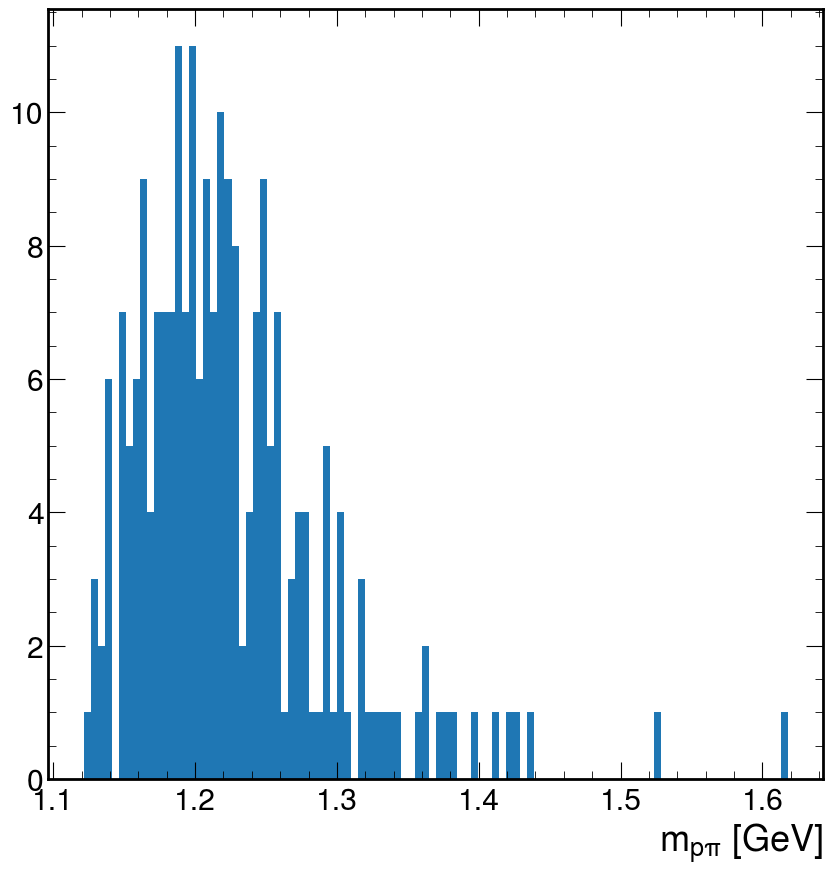

In [16]:
masses=[]
for A in "D":
    maxEvents=200000
    evtcount = 0
    for event in trees[A]:
        evtcount+=1
        if evtcount >maxEvents:
            break
        for i in range(len(event.barcode)):
            if event.Px[i]**2+event.Py[i]**2+event.Pz[i]**2>(.5*event.nu)**2:
                for j in range(len(event.barcode)) :
                    if j == i or event.barcode[j] !=-211 or event.E[j]/event.nu < 0.05 or event.E[j]<.350 : continue
                    pT1=np.hypot(event.Px[i],event.Py[i])
                    pT2=np.hypot(event.Px[j],event.Py[j])
                    if pT1<.250 or pT2<.250: continue
                    #crossp=event.Px[i]*event.Py[j]-event.Px[j]*event.Py[i]
                    dphi = np.arctan2(event.Py[i],event.Px[i])-np.arctan2(event.Py[j],event.Px[j])
                    while dphi>np.pi: dphi-=2*np.pi
                    while dphi<-np.pi: dphi+=2*np.pi
                    dphi=abs(dphi)
                    if event.barcode[i]!=2212:
                        continue
                    drap=np.log((event.E[i]+event.Pz[i])/(event.E[i]-event.Pz[i])/\
                                       ((event.E[j]+event.Pz[j])/(event.E[j]-event.Pz[j])))/2
                    if drap<1 and dphi<np.pi/8:
                        masses.append(np.sqrt(-(event.Px[i]+event.Px[j])**2-(event.Py[i]+event.Py[j])**2-(event.Pz[i]+event.Pz[j])**2+(event.E[i]+event.E[j])**2))
plt.hist(masses,bins=100)
plt.xlabel("$m_{p\pi}$ [GeV]")
plt.show()